# Census Income Modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from scipy.stats import linregress
import pipeline_utilities as p_util
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


In [2]:
# Import and examine the training dataset
train_data = pd.read_csv("../Project2_Resources/census-income-train.csv")
train_data.head()

,Age,Class,Industry,Occupation,Education,Wage per hour,Education last week,Marital,Major Industry,Major Occupation,...,FatherCountry,MotherCountry,BirthCountry,Citizenship,Self employed,VetQtnaire,Veteran,Weeks Worked,Year,Above50K
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,-50000
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000


In [3]:
# Import and examine the test dataset
test_data = pd.read_csv("../Project2_Resources/census-income-test.csv")
test_data.head()

,Age,Class,Industry,Occupation,Education,Wage per hour,Education last week,Marital,Major Industry,Major Occupation,...,FatherCountry,MotherCountry,BirthCountry,Citizenship,Self employed,VetQtnaire,Veteran,Weeks Worked,Year,Above50K
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,-50000
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,-50000
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,-50000
3,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,-50000
4,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,-50000


In [4]:
# Review the columns
#train_data.columns

In [5]:
# Review the values
#train_data.describe()

In [6]:
combined_data = pd.concat([train_data, test_data])
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299285 entries, 0 to 99761
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  299285 non-null  int64  
 1   Class                299285 non-null  object 
 2   Industry             299285 non-null  int64  
 3   Occupation           299285 non-null  int64  
 4   Education            299285 non-null  object 
 5   Wage per hour        299285 non-null  int64  
 6   Education last week  299285 non-null  object 
 7   Marital              299285 non-null  object 
 8   Major Industry       299285 non-null  object 
 9   Major Occupation     299285 non-null  object 
 10  Race                 299285 non-null  object 
 11  Hispanic             299285 non-null  object 
 12  Gender               299285 non-null  object 
 13  Labor union          299285 non-null  object 
 14  Unemployment Reason  299285 non-null  object 
 15  Employment Status    29

In [7]:
# Define a function
def set_target(above50k):
    if above50k == '-50000':
        return 0
    return 1

# "Apply" the function to the amount column in the two data sets
combined_data['KTarget'] = combined_data['Above50K'].apply(set_target)
combined_data['KTarget'].value_counts()

KTarget
0    280717
1     18568
Name: count, dtype: int64

In [8]:
columns_to_encode = ['Class', 'Education', 'Education last week', 'Marital',
                     'Major Industry', 'Major Occupation', 'Race', 'Employment Status',
                     'Hispanic', 'Gender', 'Labor union', 'Unemployment Reason', 
                     'TaxFiler', 'Previous Region', 'Previous State', 'Family Status', 
                     'Household', 'MIGMSA', 'MIGRegion', 'MIGMove',
                     '1YearAgo', 'PrevSunBelt', 'Parents', 'FatherCountry', 'MotherCountry', 
                     'BirthCountry', 'Citizenship', 'Self employed', 
                     'VetQtnaire', 'Veteran' 
                    ]

# Make a copy of the dataset
combined_data_copy = combined_data.copy()

# Loop through columns_to_encode and convert the columns to category codes
for column in columns_to_encode:
    combined_data_copy[column] = combined_data_copy[column].astype("category").cat.codes
    
combined_data_copy.head()

,Age,Class,Industry,Occupation,Education,Wage per hour,Education last week,Marital,Major Industry,Major Occupation,...,MotherCountry,BirthCountry,Citizenship,Self employed,VetQtnaire,Veteran,Weeks Worked,Year,Above50K,KTarget
0,73,3,0,0,12,0,2,6,14,6,...,40,40,4,0,1,2,0,95,-50000,0
1,58,6,4,34,16,0,2,0,4,8,...,40,40,4,0,1,2,52,94,-50000,0
2,18,3,0,0,0,0,1,4,14,6,...,41,41,0,0,1,2,0,95,-50000,0
3,9,3,0,0,10,0,2,4,14,6,...,40,40,4,0,1,0,0,94,-50000,0
4,10,3,0,0,10,0,2,4,14,6,...,40,40,4,0,1,0,0,94,-50000,0


In [9]:
X = combined_data_copy.drop(columns=['Above50K', 'KTarget'])

In [10]:
#train_data_copy[['KTarget', 'Capital Gains', 'Parents', 'Veteran', 'Family Status', 'Industry', 'Weeks Worked', 'Wage per hour']].corr()
#print(X.corr())

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299285 entries, 0 to 99761
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  299285 non-null  int64  
 1   Class                299285 non-null  int8   
 2   Industry             299285 non-null  int64  
 3   Occupation           299285 non-null  int64  
 4   Education            299285 non-null  int8   
 5   Wage per hour        299285 non-null  int64  
 6   Education last week  299285 non-null  int8   
 7   Marital              299285 non-null  int8   
 8   Major Industry       299285 non-null  int8   
 9   Major Occupation     299285 non-null  int8   
 10  Race                 299285 non-null  int8   
 11  Hispanic             299285 non-null  int8   
 12  Gender               299285 non-null  int8   
 13  Labor union          299285 non-null  int8   
 14  Unemployment Reason  299285 non-null  int8   
 15  Employment Status    29

## Split the Data into Training and Testing Sets

In [12]:
# Create the labels set `y` and features DataFrame `X`
y = combined_data_copy['KTarget']

In [13]:
# Check the balance of the labels variable (`y`) by using the `value_counts` function.
y.value_counts()

KTarget
0    280717
1     18568
Name: count, dtype: int64

In [14]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [15]:
# Instantiate the RandomUnderSampler instance
#rus = RandomUnderSampler(random_state=1)

# Fit the data to the model
#X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Count distinct resampled values
#y_resampled.value_counts()

In [16]:
# Instantiate the RandomOverSampler instance
random_oversampler = RandomOverSampler(random_state=1)

# Fit the data to the model
X_resampled, y_resampled = random_oversampler.fit_resample(X_train, y_train)

# Count distinct values
y_resampled.value_counts()

KTarget
0    210551
1    210551
Name: count, dtype: int64

## Scale the Features

Use the `StandardScaler` to scale the features data. Remember that only `X_train` and `X_test` DataFrames should be scaled.

In [17]:
# Transforming the test dataset based on the fit from the training dataset
X_train_scaled, X_test_scaled = p_util.scale_data_with_StandardScaler(X_resampled, X_test)

Scaled X_train data: [[-0.36821862  0.24004422 -0.59018214 ...  0.39871967 -0.12003471
  -1.02867979]
 [ 0.46972588  1.76220813 -0.97633268 ...  0.39871967  0.18046968
  -1.02867979]
 [ 0.78395507  0.24004422  0.62343387 ...  0.39871967  0.73854925
  -1.02867979]
 ...
 [ 0.20786822  1.00112617  0.62343387 ...  0.39871967  0.73854925
  -1.02867979]
 [-0.21110403  0.24004422 -0.75567523 ...  0.39871967  0.73854925
   0.97211981]
 [ 0.05075363  0.24004422  1.06474878 ...  0.39871967  0.73854925
  -1.02867979]]
Scaled X_train data: [[ 5.22097411e-01  2.40044218e-01  1.06474878e+00 ...  3.98719667e-01
   7.38549248e-01 -1.02867979e+00]
 [-5.77704744e-01 -5.21037739e-01 -1.19699014e+00 ...  3.98719667e-01
  -1.49376903e+00  9.72119812e-01]
 [-1.67750690e+00 -5.21037739e-01 -1.19699014e+00 ... -2.58731333e+00
  -1.49376903e+00  9.72119812e-01]
 ...
 [-1.61790077e-03  2.40044218e-01  8.44091323e-01 ...  3.98719667e-01
   7.38549248e-01 -1.02867979e+00]
 [ 1.55496693e-01  2.40044218e-01  2.3728

In [18]:
random_state = 1
p_util.gradient_boost_model_generator(X_train_scaled, X_test_scaled, y_resampled, y_test, random_state)

Gradient Boosting Training Data Score: 0.8782741473562224
Gradient Boosting Testing Data Score: 0.8526502900216514
Gradient Boosting Predictions Accuracy Score: 0.8526502900216514
              precision    recall  f1-score   support

           1       0.28      0.89      0.43      4656
           0       0.99      0.85      0.92     70166

    accuracy                           0.85     74822
   macro avg       0.64      0.87      0.67     74822
weighted avg       0.95      0.85      0.89     74822

Gradient Boosting Balanced Accuracy Score: 0.8709040798977153


In [20]:
random_state = 1
p_util.ada_boost_model_generator(X_train_scaled, X_test_scaled, y_resampled, y_test, random_state)

Ada Boosting Training Data Score: 0.8712924659583664
Ada Boosting Testing Data Score: 0.8453396059982358
Ada Boosting Predictions Accuracy Score: 0.8453396059982358
              precision    recall  f1-score   support

           1       0.27      0.89      0.42      4656
           0       0.99      0.84      0.91     70166

    accuracy                           0.85     74822
   macro avg       0.63      0.87      0.66     74822
weighted avg       0.95      0.85      0.88     74822

Ada Boosting Balanced Accuracy Score: 0.8651011958337778


In [21]:
%%time
random_state = 1
p_util.extra_trees_model_generator(X_train_scaled, X_test_scaled, y_resampled, y_test, random_state)

Extra Trees Training Data Score: 1.0
Extra Trees Testing Data Score: 0.9499077811338911
Extra Trees Predictions Accuracy Score: 0.9499077811338911
              precision    recall  f1-score   support

           1       0.70      0.34      0.46      4656
           0       0.96      0.99      0.97     70166

    accuracy                           0.95     74822
   macro avg       0.83      0.66      0.71     74822
weighted avg       0.94      0.95      0.94     74822

Extra Trees Balanced Accuracy Score: 0.663681747153755
CPU times: total: 1min 22s
Wall time: 3min 12s


## Try a Decision Tree model

In [22]:
p_util.decision_tree_model_generator(X_train_scaled, X_test_scaled, y_resampled, y_test)

Decision Tree Training Data Score: 1.0
Decision Tree Testing Data Score: 0.933749431985245
Decision Tree Predictions Accuracy Score: 0.933749431985245
              precision    recall  f1-score   support

           1       0.47      0.45      0.46      4656
           0       0.96      0.97      0.96     70166

    accuracy                           0.93     74822
   macro avg       0.72      0.71      0.71     74822
weighted avg       0.93      0.93      0.93     74822

Decision Tree Balanced Accuracy Score: 0.7078044635534407


## Create and Fit a PCA Model

Try a PCA model. 

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_data_pca = pca.fit_transform(X_train_scaled)
X_data_pca[:5]
pca_df = pd.DataFrame(
    X_data_pca,
    columns=["PCA1", "PCA2"]
)

In [24]:
X_data_pca[:5]

array([[-2.28948936, -1.55428186],
       [-1.6390291 , -2.71822769],
       [-1.70583788, -3.02588377],
       [ 0.12659911,  5.49926085],
       [-4.21761069,  3.91265628]])

In [25]:
pca.explained_variance_ratio_

array([0.14176488, 0.12596875])

In [26]:
from sklearn.cluster import KMeans
inertia = []
k = list(range(1, 11))
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    k_model.fit(pca_df)
    inertia.append(k_model.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

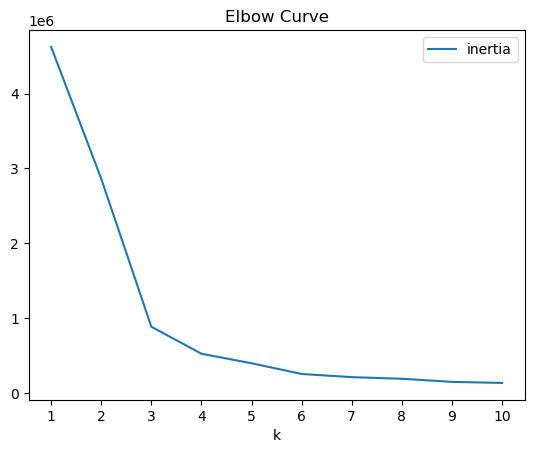

In [27]:
# Review the DataFrame
df_elbow.head()
df_elbow.plot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

In [28]:
# Determine the rate of decrease between each k value
k = df_elbow["k"]
inertia = df_elbow["inertia"]
for i in range(1, len(k)):
    percentage_decrease = (inertia[i-1] - inertia[i]) / inertia[i-1] * 100
    print(f"Percentage decrease from k={k[i-1]} to k={k[i]}: {percentage_decrease:.2f}%")

Percentage decrease from k=1 to k=2: 38.10%
Percentage decrease from k=2 to k=3: 69.05%
Percentage decrease from k=3 to k=4: 40.73%
Percentage decrease from k=4 to k=5: 24.21%
Percentage decrease from k=5 to k=6: 36.01%
Percentage decrease from k=6 to k=7: 16.59%
Percentage decrease from k=7 to k=8: 10.23%
Percentage decrease from k=8 to k=9: 21.67%
Percentage decrease from k=9 to k=10: 9.49%


In [29]:
# Define the model with 5 clusters
model = KMeans(n_clusters=3, n_init='auto', random_state=0)

# Fit the model
model.fit(pca_df)

# Make predictions
k_3 = model.predict(pca_df)

# Create a copy of the PCA DataFrame
pca_predictions_df = pca_df.copy()

# Add a class column with the labels
pca_predictions_df["income_segments"] = k_3

<Axes: xlabel='PCA1', ylabel='PCA2'>

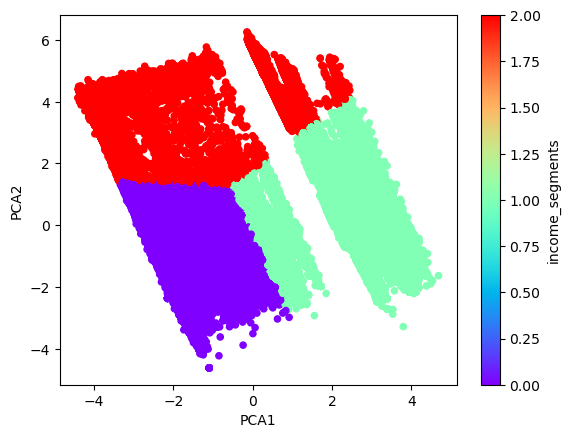

In [31]:
pca_predictions_df.plot.scatter(
    x="PCA1",
    y="PCA2",
    c="income_segments",
    colormap='rainbow')

In [32]:
pca_component_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2'], index=X_train.columns)
pca_component_weights.sort_values('PCA1', ascending=False)

,PCA1,PCA2
Year,0.383168,0.143716
Employment Status,0.281329,0.032560
Parents,0.126808,-0.347786
Veteran,0.123091,-0.334861
Weeks Worked,0.112814,-0.326496
Under18,0.103818,-0.253709
Family Status,0.102995,-0.271976
Household,0.094547,-0.253496
Industry,0.094039,-0.266758
Age,0.087674,-0.245916


## Create and Fit a Logistic Regression Model

Create a Logistic Regression model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [33]:
# All requirements above have been coded into pipeline_utilities python program file

random_state = 1
p_util.logistic_regression_model_generator(X_train_scaled, X_test_scaled, y_resampled, y_test, random_state)


C:\Users\kalas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Training Data Score: 0.8552108515276584
Logistic Regression Testing Data Score: 0.8254657720991152
Logistic Regression Predictions Accuracy Score: 0.8254657720991152
              precision    recall  f1-score   support

           1       0.25      0.87      0.38      4656
           0       0.99      0.82      0.90     70166

    accuracy                           0.83     74822
   macro avg       0.62      0.85      0.64     74822
weighted avg       0.94      0.83      0.87     74822

Logistic Regression Balanced Accuracy Score: 0.8464839070146172
Logistic Regression roc_auc_score: 0.9299720289709202


## Create and Fit a Random Forest Classifier Model

Create a Random Forest Classifier model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [19]:
# All details have been coded into pipeline_utilities python program file
# Tried 500 estimators, almost no difference and balanced accuracy score was slightly worse, putting it back to 100

random_state = 1
n_estimators = 100
p_util.random_forest_model_generator(X_train_scaled, X_test_scaled, y_resampled, y_test, random_state, n_estimators, X_train.columns)


Random Forest Training Data Score: 1.0
Random Forest Testing Data Score: 0.9527144422763358
Random Forest Predictions Accuracy Score: 0.9527144422763358
              precision    recall  f1-score   support

           1       0.67      0.48      0.56      4656
           0       0.97      0.98      0.98     70166

    accuracy                           0.95     74822
   macro avg       0.82      0.73      0.77     74822
weighted avg       0.95      0.95      0.95     74822

Random Forest Balanced Accuracy Score: 0.7322537157343023
[(0.11522885069883683, 'Occupation'), (0.10625302248664621, 'Age'), (0.10032404302084051, 'Weeks Worked'), (0.07285641736428115, 'Under18'), (0.07019730051841579, 'Dividends'), (0.05888231023440702, 'Industry'), (0.05754629610077241, 'Instance Weight'), (0.04728419305281398, 'Education'), (0.037505484946215015, 'Gender'), (0.03605637579978968, 'Family Status')]


## Create and Fit an SVM Model

Create a Support Vector Machine model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. 

In [ ]:
# All details have been coded into pipeline_utilities python program file, takes FOREVER to run

#kernel_type = 'linear'
#p_util.svm_model_generator(X_train_scaled, X_test_scaled, y_resampled, y_test, kernel_type)


## Findings and Conclusions

What was the result of your analysis? Which model performed better?

* All models that I tried achieved over 90% accuracy score with testing data and predictions. The Random Forest model had the best F1 scores of 54%-98% with Gradient Boost running a close second at 53%-98%. PCA analysis resulted in a very pretty set of 4 segments, but the total explained variance by PCA1 and PCA2 was 0.27, so did not reduce dimensionality effectively. My SVC model took forever to run. I ran a total of 7 models.